# Analyse prédictive des cours des actions FAANG

Réalisé par :
* ESSOH Lasme Ephrem Dominique
* ELAOUNI Fouzia

# Introduction

La propagation du Covid-19 dans le monde continue de susciter maintes inquiétudes. Outre les conséquences humaines tragiques de la pandémie, le Covid-19 engendre aussi des incertitudes sur les marchés financiers mondiaux.
Problématique : Peut-on parler de prévision dans cette situation de la pandémie ?

Pour répondre à cette problèmatique, nous examinerons les données du marché boursier, en particulier celles des firmes technologique. Plus précisement, nous ménons une analyse prédictive des cours des actions FAANG.  

FAANG fait référence aux actions de cinq sociétés technologiques américaines de premier plan : Facebook (FB), Amazon (AMZN), Apple (AAPL), Netflix (NFLX) ; et Alphabet ou Google (GOOG).Le terme a été inventé par Jim Cramer, l'animateur de télévision de Mad Money de CNBC, en 2013, qui a félicité ces entreprises pour être totalement dominantes sur leurs marchés.

# 1. Chargement du jeu de données et traitement des données

## 2.1. Installation du module pandas_datareader

Nous utilisons le module <b>pandas_datareader</b> afin de récuperer les données, par scrapping, du cours des actions du stock market FAANG. La source de données utilisée est <a href = "https://finance.yahoo.com/"> Yahoo! La finance </a>.

In [2]:
import sys
!{sys.executable} -m pip install pandas_datareader

## 2.2. Récupération des données

In [2]:
import pandas as pd
import numpy as np
from pandas_datareader.data import DataReader #pour récup. les datas sur yahoo finance !
from datetime import datetime #gestion de dates

#### 2.2.1. récupération des séries temporelles des cours des actions pour chaque firme de la tech

In [17]:
# liste des firmes de la tech
FAANG = ['FB','AAPL','AMZN', 'NFLX','GOOG']

# date de début et date de fin d'extraction des données : extraction de 1 année complète + 1 année retrospective de cours
fin = datetime.now()
debut = datetime(fin.year - 1, fin.month, fin.day)

# récupération des séries temporelles FB, AAPL, AMZN, NFLX et GOOG
for stock in FAANG :   
    globals()[stock] = DataReader(stock, 'yahoo', debut, fin)

#### 2 .2.2. exemples du format des données

Nous avons récupérés au total 5 séries temporelles : celles de FB, AAPL, AMZN, NFLX et GOOG. Chaque séries temporelles contient 5 variables : 
* High = la valeur maximale du cours de l'action au jour aaaa-mm-jj (en USD)
* Low = la valeur minimale du cours de l'action au jour aaaa-mm-jj (en USD)
* Open = la valeur du cours de l'action à l'overture du marché au jour aaaa-mm-jj (en USD)
* Close = la valeur du cours de l'action à la fermeture du marché au jour aaaa-mm-jj (en USD)
* Volume = le volume total d'action négociés au jour aaaa-mm-jj (en nombre absolu)
* Adj Close = la valeur ajustée (par rapport au dividendes) du cours de l'action à la fermeture du marché au jour aaaa-mm-jj (en USD)

Par exemple, affichons 5 observations au harsard des données de FACEBOOK et APPLE :

In [8]:
FB.sample(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-02,161.350006,155.919998,159.100006,158.190002,20886300,158.190002
2020-10-06,265.690002,258.239990,261.779999,258.660004,18696900,258.660004
2020-09-23,257.989990,248.149994,255.259995,249.020004,19641300,249.020004
2020-03-31,170.929993,164.199997,165.479996,166.800003,23676300,166.800003
2020-07-17,244.160004,237.860001,241.000000,242.029999,18152400,242.029999


In [9]:
AAPL.sample(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-04,122.860001,121.519997,122.599998,122.250000,78260400.0,122.250000
2020-12-03,123.779999,122.209999,123.519997,122.940002,78967600.0,122.940002
2019-12-20,70.662498,69.639999,70.557503,69.860001,275978000.0,68.699387
2020-02-10,80.387497,78.462502,78.544998,80.387497,109348800.0,79.239594
2020-07-28,94.550003,93.247498,94.367500,93.252502,103625600.0,92.924355


#### 2.2.3. constitution de données de panel

A partir des 5 séries temporelles récupérées, nous constituons des données de panel en concatenant ces séries.

In [30]:
liste_firme = [FB, AAPL, AMZN, NFLX, GOOG]
nom_firme = ["FACEBOOK", "APPLE", "AMAZON", "NETFLIX", "GOOGLE"]

for firme, nom in zip(liste_firme, nom_firme):
    firme["Nom firme"] = nom
    
data = pd.concat(liste_firme, axis = 0)

Données finales : 
* Structure de données de panel $X_{it}$, $X_{it}$ désignant un vecteur ligne du tableau
* Contenant 5 individus statistiques (les firmes) : $i \in {1 \ldots 5}$
* Observés à une jour $t$ entre le jour d'aujourd'hui et le jour d'aujourd'hui diminué d'une année. Par exemple, au jour du 10/12/2020 d'utilisation de ce notebook, les données couvrent la période allant du 10/12/2019 au 10/12/2020.

In [11]:
data

,High,Low,Open,Close,Volume,Adj Close,Nom firme
Date,,,,,,,
2019-12-11,202.630005,200.279999,200.279999,202.259995,8036800.0,202.259995,FACEBOOK
2019-12-12,203.660004,194.100006,202.350006,196.750000,23734800.0,196.750000,FACEBOOK
2019-12-13,196.800003,193.169998,196.399994,194.110001,18798000.0,194.110001,FACEBOOK
2019-12-16,199.119995,194.809998,195.270004,197.919998,14911500.0,197.919998,FACEBOOK
2019-12-17,199.000000,196.130005,198.839996,198.389999,10175700.0,198.389999,FACEBOOK
...,...,...,...,...,...,...,...
2020-12-07,1832.369995,1805.780029,1819.000000,1819.479980,1320900.0,1819.479980,GOOGLE
2020-12-08,1821.900024,1796.204956,1810.099976,1818.550049,1096300.0,1818.550049,GOOGLE
2020-12-09,1834.270020,1767.810059,1812.010010,1784.130005,1507600.0,1784.130005,GOOGLE


# 2. Statistique descriptive et visualisation

 ## 2.1. Présentation et visualisation 

#### 2.1.1.  Niveau moyen des cours  des actions négociés

In [12]:
vm_stock_2020 = round(data.groupby([(data.index.year), (data["Nom firme"])]).mean().loc[2020,:],2)

In [13]:
vm_stock_2020

,High,Low,Open,Close,Volume,Adj Close
Nom firme,,,,,,
AMAZON,2687.92,2612.55,2651.58,2651.27,4.991203e+06,2651.27
APPLE,94.76,92.02,93.37,93.45,1.474372e+08,92.91
FACEBOOK,235.86,228.70,232.24,232.46,2.271495e+07,232.46
GOOGLE,1484.72,1447.30,1464.78,1466.87,1.909858e+06,1466.87
NETFLIX,450.19,434.10,441.99,442.53,7.118362e+06,442.53


#### 2.1.2. Evolution du cours des actions journalié

Cette évolution sera apprécié avec la valeur ajustée du cours de l'action ajusté à la fermeture du marché.

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

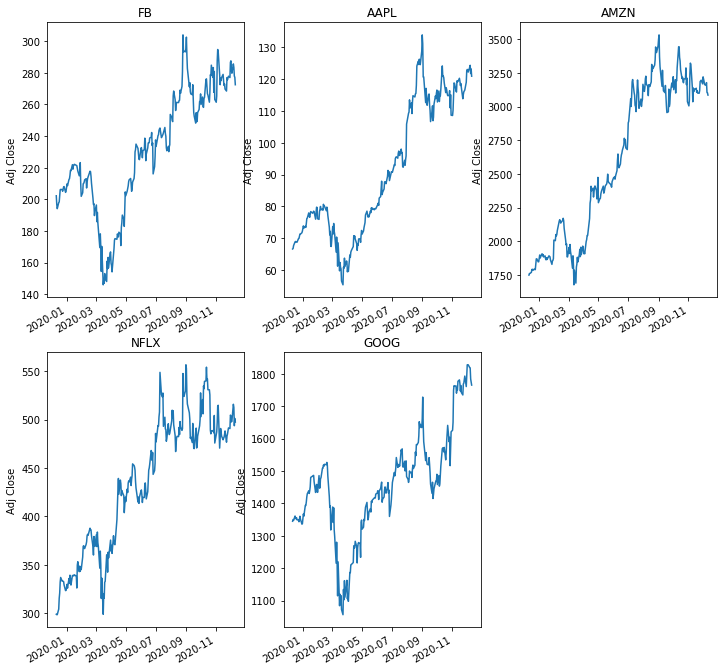

In [15]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, firme in enumerate(liste_firme, 1):
    plt.subplot(2, 3, i)
    firme['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"{FAANG[i - 1]}")

On remarque une chute importante des cours des actions aux mois de mars à cause de la crise de la pandémie de covid 19.

## 2.2. La notion de rendement 

### 2.2.1. Cadre théorique 

La théorie de gestion de portefeuille s'appuie sur la notion du rendement qui mesure pendant un intervalle de temps donné l'appréciation ou la dipréciation relative de la valeur d'un actif donné où d'un portefeuille d'actifs.
Soit $x_t$ le cours de l’action X au jour t, le rendement simple n'est autre que
 $r^*_t=\frac{x_t-x_{t-1}}{x_{t-1}}$
 
On notera aussi le log-rendement comme suit : $r_t={\mathrm{log} (\ \frac{x_t}{x_{t-1}}\ )\ }={\mathrm{log} (r^*_t+1\ \ )\ }$  
Le développement limité  de $r_t$ au voisinage de 0 donne :

$r_t={\mathrm{log} (r^*_t+1\ \ )\ }$ $\approx$ $r^*_t$



### 2.2.2. Visualisation 

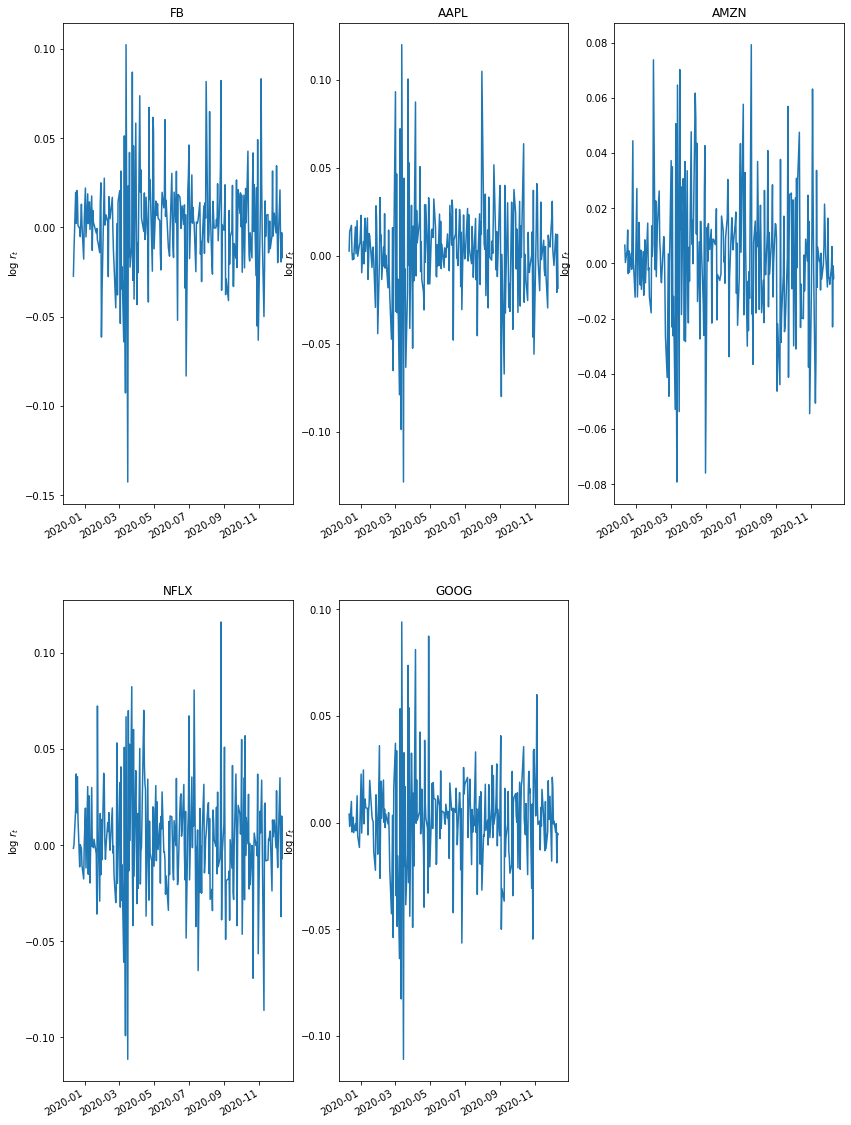

In [50]:
plt.figure(figsize=(12, 8))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, firme in enumerate(liste_firme, 1):
    plt.subplot(2, 3, i)
    firme['Adj Close'].pct_change().plot()
    plt.ylabel('log $r_t$')
    plt.xlabel(None)
    plt.title(f"{FAANG[i - 1]}")
    

On remarque déjà l'absence de tendance dans la série rendement, avec grand choc au mois de mars à cause de la crise pandémique, ce qui attendu !

### 2.2.3. Propriétés statistiques 

Passant à la vérifications de quelques propriétés statistiques de la série des rendements.

###  Stationarité

#### Rappel : 
Une série est stationnaire si :

- $E(y_t)=\mu$ canstante indépendante de $t$

- $Var(y_t)=\sigma^2 < \infty $

- $\gamma_t=cov(y_t,y_{t-1})$ ne dépends que de l'entier l

On tranchera surla stationarité de la série des rendements avec un test de dickey-fuller:

Test de dickey-fuller :

Soit $\Delta y_t = y_t-y_{t-1}=\alpha+\beta t +\gamma y_{t-1}+e_t$. 
On teste si $\gamma=0 : y_t$ s'agira d'une marche aléatoire si c'est le cas.
Sinon, si $-1<1+\gamma<1$, on affirmera que $y_t$ est stationnaire.


In [22]:
from statsmodels.tsa.stattools import adfuller
adfuller(GOOG['Adj Close'].pct_change().dropna(), maxlag=None, regression='c', autolag='AIC', store=False, regresults=True)

(-4.133756345310591,
 0.0008513046580750298,
 {'1%': -3.457664132155201,
  '5%': -2.8735585105960224,
  '10%': -2.5731749894132916},
 <statsmodels.stats.diagnostic.ResultsStore at 0x8932e80>)

La P-value est inférieur à 5 % donc on rejette $H_0$, d'où la série est stationnaire 

###  Normalité

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

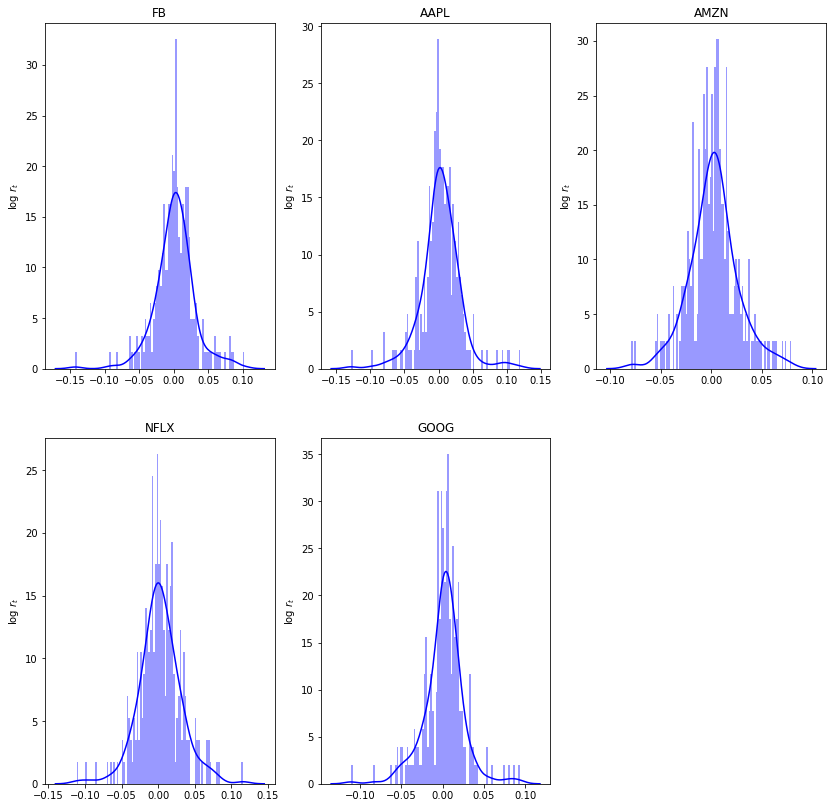

In [31]:
plt.figure(figsize=(14, 14))
for i, firme in enumerate(liste_firme, 1):
    plt.subplot(2, 3, i)
    sns.distplot(firme['Adj Close'].pct_change().dropna(), bins=100, color='blue')
    plt.ylabel('log $r_t$')
    plt.xlabel(None)
    plt.title(f"{FAANG[i - 1]}")

Beaucoup de faits montrent que les distributions de rendements des actifs financiers ont des queues plus épaisses que les distributions normales comme mentionnées auparavant. Nous allons vérifier si les courbes de rendement des différents actifs représentent la distribution gaussienne par un test qui se base seulement sur les valeurs de coefficient d’asymétrie et du coefficient d'aplatissement de la distribution :


 #### Test de Jarque-Bera.
$H_0$ $:$ " la distiribution suit une loi normale "

La statistique de Jaque-Bera est: $JB=\frac{n}{6}$$(S^2+\frac{(k-3)^2}{4})$

Cette statistique suit une loi de $\chi^2$ de degré de libérté 2.
  
Avec :

-$n$ le nombre d'observations 

-$coef f d'assymétrie=S=$$\frac{\frac{1}{n}\sum^n_{i=1}{{(x_i-\overline{x\ })}^3}}{{(\frac{1}{n}\sum^n_{i=1}{{(x_i-\overline{x\ })}^2)}}^{\frac{3}{2}}}$

-$coef f d'applatissement=k=$$\frac{\frac{1}{n}\sum^n_{i=1}{{(x_i-\overline{x\ })}^4}}{{(\frac{1}{n}\sum^n_{i=1}{{(x_i-\overline{x\ })}^2)}}^2}$


   
Nous utilisons le module stats de scipy pour réaliser le test de Jarque-Bera.

In [59]:
from scipy import stats
for i, firme in enumerate(liste_firme, 1):
    x=firme['Adj Close'].pct_change().dropna()
    print("JB"f"{FAANG[i - 1]}", "=====" ,stats.jarque_bera(x) )

JBFB ===== Jarque_beraResult(statistic=125.08076656953949, pvalue=0.0)
JBAAPL ===== Jarque_beraResult(statistic=153.52855899225705, pvalue=0.0)
JBAMZN ===== Jarque_beraResult(statistic=15.5780296841473, pvalue=0.00041426079532336235)
JBNFLX ===== Jarque_beraResult(statistic=46.63075100327056, pvalue=7.486189446126446e-11)
JBGOOG ===== Jarque_beraResult(statistic=147.33084224174826, pvalue=0.0)


On rejete $H_0$ pour les 5 actions puisque toutes les P-values sont  inférieures à 5 %. Donc nous sommes loin de distribution normale. D'ailleurs, le résultat était prévisible puisque les distributions de rendements de ces actions ont des queues plus épaissés que les distributions normales.

## 2.3. La notion du risque 

##### Cadre théorique

Le risque du marché d’un portefeuille provient des variations des cours des actifs financiers et de leur effet négatif sur la valeur financière totale du portefeuille. Traduit en terme de rendement, les rentabilités des actifs deviennent alors des variables aléatoires dont l’évolution future n’est pas, à priori, connue et quantifiable. Dans le cas des actions on distingue entre le risque systémique du marché et le risque spécifique de chaque action. 

Exemple : 

Risque systémique : La crise de covid-19

Risque spécifique : Liquidation de l’entreprise X 

Dans son modèle moyen-variance de Markowitz a utilisé la variance des rendements pour mesurer en raison de ses propriétés statistiques qui permettent d’expliciter la variance $σ_p^2$. D’un portefeuille à partir des variances individuelles i des N actifs le composant :

${{\sigma }_{p\ }}^2~~=\sum_j{wj\ {{\sigma }_{j\ }}^2}-\sum_i{\sum_j{wi\ wj\ {\rho }_{i,j}\ {\sigma }_i}}$ 

Avec:

- ${{\sigma }_{p\ }}^2~$: La variance des rendements moyens du portefeuille ( la volatilité)

- ${{\sigma }_{i\ }}^2~$: La variance des rendements moyens de l'action i ( la volatilité)

- $w_i$ : Le poids de chaque action dans le portefeuille 

- ${\rho }_{i,j}$~: La corrélation linéaire entre l'action i et j 

Le probléme de l'investisseur c'est de choisir les $wi$  tel que le portefeuille soit de variance minimal é un seuil de rentabilité donné.
 
\begin{array}{c}
{\mathrm{min\ \ \ \ \ } \ \ \ \ \ \ {\sigma }_{p\ }\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ } \\ \ \ \ \ \
sc.\ \ \ \ \ \ \ \ \ \ \ \ \ \ W^T\ R=R_p\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  \\ 
\ \  W^T\ \mathrm{l}=1\ \ \ \ \ \ \  \end{array}



Avec R le vecteur des rendements moyens ( rentabilité ) et W le vecteur des poids.





In [8]:
# récupération de la matrice des rentabilités des 5 actions 
# liste des firmes de la tech
FAANG = ['FB','AAPL','AMZN', 'NFLX','GOOG']

# date de début et date de fin d'extraction des données : extraction de 1 année complète + 1 année retrospective de cours
fin = datetime.now()
debut = datetime(fin.year - 1, fin.month, fin.day)

Matcours = DataReader(FAANG, 'yahoo', debut, fin)['Adj Close']
Matrend = Matcours.pct_change()
Matrend.tail()

Symbols,FB,AAPL,AMZN,NFLX,GOOG
Date,,,,,
2020-12-07,0.021022,0.012270,-0.001448,0.035059,-0.004655
2020-12-08,-0.007634,0.005091,0.006108,-0.006049,-0.000511
2020-12-09,-0.019337,-0.020904,-0.023004,-0.037179,-0.018927
2020-12-10,-0.002879,0.011989,-0.000873,0.015174,-0.004932
2020-12-11,-0.012883,-0.006735,0.004814,0.004251,0.003628


#####   Analysons les corrélations entres les 5 actifs 2 à 2

Symbols        FB      AAPL      AMZN      NFLX      GOOG
Symbols                                                  
FB       1.000000  0.773270  0.680628  0.579490  0.803358
AAPL     0.773270  1.000000  0.701717  0.566705  0.757010
AMZN     0.680628  0.701717  1.000000  0.675870  0.684055
NFLX     0.579490  0.566705  0.675870  1.000000  0.535157
GOOG     0.803358  0.757010  0.684055  0.535157  1.000000


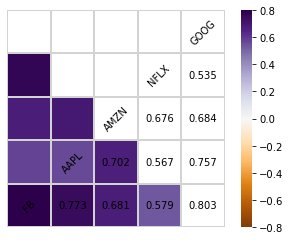

In [9]:
#Matrice des corrélations
corr = Matrend.corr()
print(corr)
# Les coefficients de corrélation dans le triangle en bas
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Création de la matrice
fig, ax = plt.subplots()

# Affectation à chaque case sa valeur de coefficient de corrélation on utilisant mask
vmax = np.abs(corr.values[~mask]).max()
sns.heatmap(corr, mask=mask, cmap=plt.cm.PuOr, vmin=-vmax, vmax=vmax,
            square=True, linecolor="lightgray", linewidths=1, ax=ax)
for i in range(len(corr)):
    ax.text(i+0.5,len(corr)-(i+0.5), corr.columns[i], 
            ha="center", va="center", rotation=45)
    for j in range(i+1, len(corr)):
        s = "{:.3f}".format(corr.values[i,j])
        ax.text(j+0.5,len(corr)-(i+0.5),s, 
            ha="center", va="center")
ax.axis("off")
plt.show()

Plus le corrélations entre les variables sont proches de 1 moins il est intéressant pour les investissuers de diversifier leur portefeuielles.

la forte corrélation entre les différentes actions était prévisible puisque en 2020 les 5 actions de FAANG ont subit presque les mêmes chocs à cause des conséquances de la crise pandémique.

En effet ces résultat se retrouvent  loin de la réalité en situation pandémique et plus réelle si on les essayent à une date de stabilité, par rapport à la pandémie.

##### Visualisation de la volatilité en fonction de la rentabilité pour les différents actions

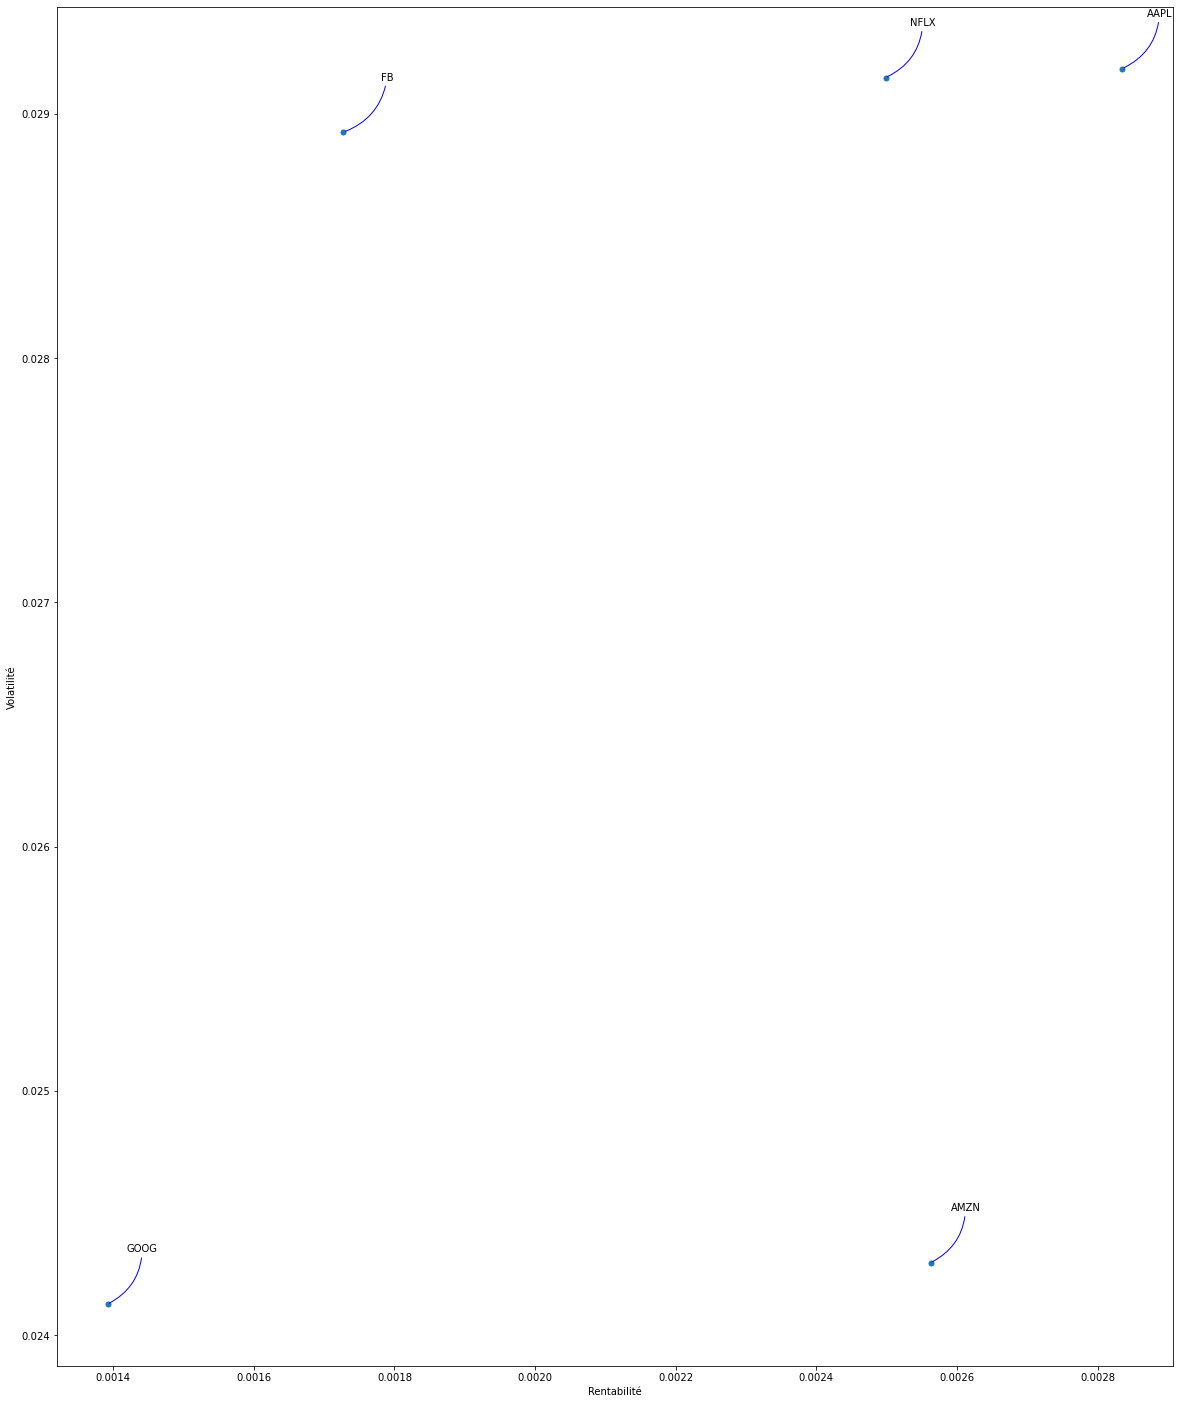

In [15]:
# On classe ces 5 actions en tremes de volatilité (le risque)
# Suppression des valeurs manquantes
Matrendvola = Matrend.dropna()
# Création de la figure 
area = np.pi*20
plt.figure(figsize=(20,25))

plt.scatter(Matrendvola.mean(),Matrendvola.std(),s=25)

plt.xlabel('Rentabilité')
plt.ylabel('Volatilité')

for label,x,y in zip(Matrendvola.columns,Matrendvola.mean(),Matrendvola.std()):
   plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))


D'après le graphe on remarque que google était l'actif le moins risqué et le moins rentable tandi que Apple est le plus rentable était le plus risqué en 2020.

# 5. Modélisation

# Conclusion